<a href="https://colab.research.google.com/github/akashbilgi/DMT/blob/main/master_dmt_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/data.csv')
print(df)


           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split


from sklearn.svm import SVC

import os

In [7]:
X = df.iloc[:,2:32]
print(X.shape)
X.head()

(569, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
y = df.diagnosis
print(y.shape)
y.head()

(569,)


0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [9]:
y_num = pd.get_dummies(y)
y_num.head()


,B,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [10]:
y_num.tail()

,B,M
564,0,1
565,0,1
566,0,1
567,0,1
568,1,0


In [11]:
X.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<AxesSubplot:>

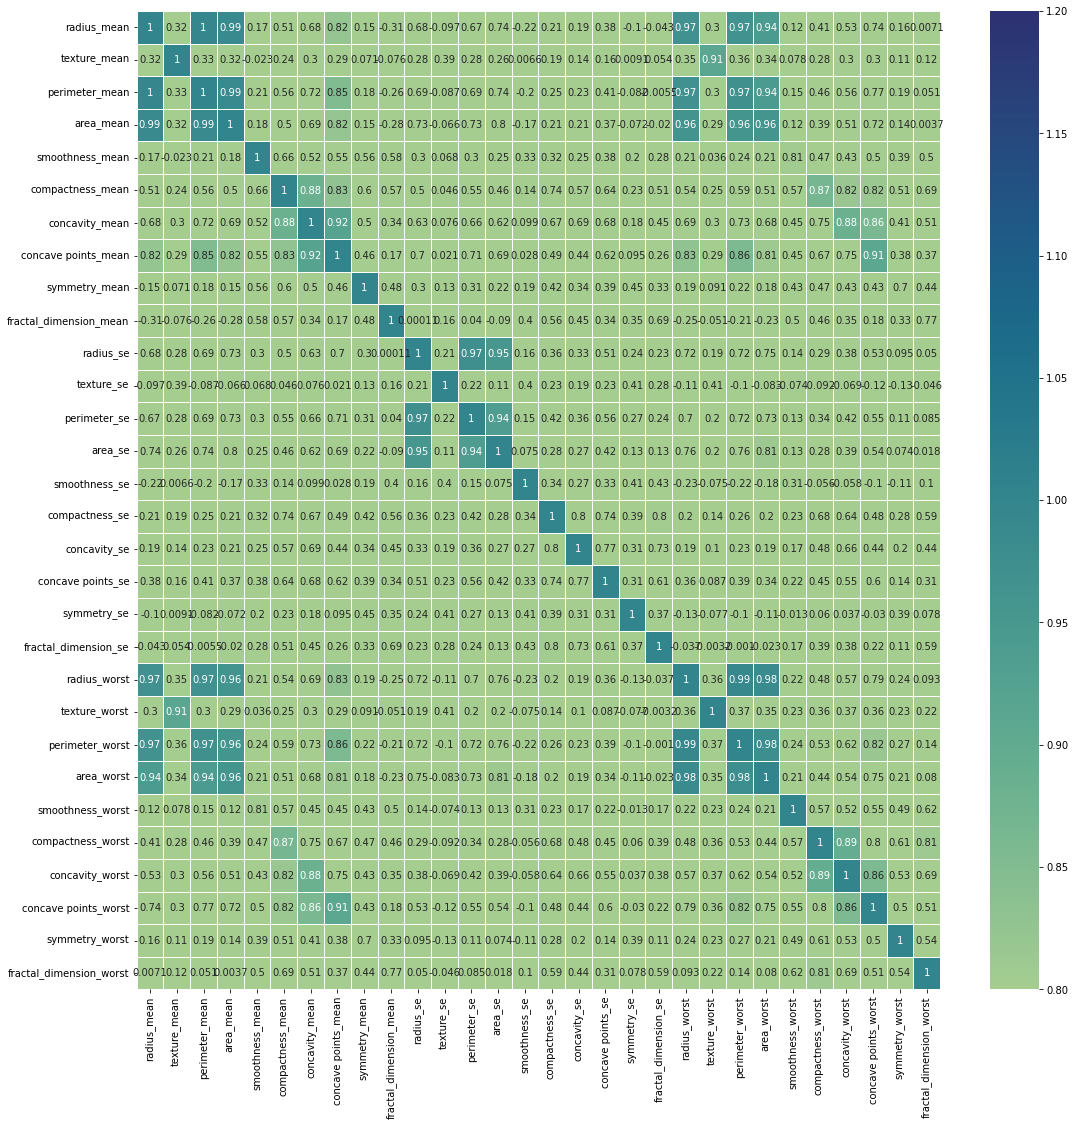

In [12]:
plt.figure(figsize=(18, 18))
sns.heatmap(X.corr(), vmin=0.80, vmax=1.2, annot=True, cmap='crest', linewidths=1)

In [13]:
#reducing the attributes in X dataframe

#1 scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#2 drop the highly correlated columns which are not useful i.e., area, perimeter, perimeter_worst, area_worst, perimeter_se, area_se 
X_scaled = pd.DataFrame(X_scaled)
X_scaled_drop = X_scaled.drop(X_scaled.columns[[2, 3, 12, 13, 22, 23]], axis=1)

#3 apply PCA on scaled data
pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(X_scaled_drop)
x_pca = pd.DataFrame(x_pca)

print("Before PCA, X dataframe shape = ",X.shape,"\nAfter PCA, x_pca dataframe shape = ",x_pca.shape)

Before PCA, X dataframe shape =  (569, 30) 
After PCA, x_pca dataframe shape =  (569, 11)


In [14]:
print(pca.explained_variance_ratio_) 
print(pca.explained_variance_ratio_.sum())

[0.42661046 0.15932139 0.10294428 0.07788731 0.06489774 0.05015242
 0.02145044 0.0187846  0.01505759 0.01197751 0.01117206]
0.9602558201892889


In [15]:
import numpy as np

In [16]:
colnames = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','diagnosis']

#target data
diag = df.iloc[:,1:2]

#combine PCA and target data
Xy = pd.DataFrame(np.hstack([x_pca,diag.values]),columns=colnames)

Xy.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,diagnosis
0,8.066802,0.414765,-2.538073,-2.608014,-1.344494,1.435172,-1.713811,-0.491329,0.655096,0.544224,0.718321,M
1,0.106798,-2.761727,-0.141345,-1.395074,0.130814,0.017362,-0.333451,-0.389474,-0.706687,0.114084,0.405121,M
2,4.386099,-1.969883,-0.226679,-1.108399,-0.700594,0.477506,0.287285,-0.079434,-0.35264,-0.654396,-0.284427,M
3,10.670616,5.914865,-4.302831,1.998226,-1.846898,3.101734,-0.812473,-1.813327,1.334007,-0.454319,-1.428596,M
4,2.03748,-1.154659,0.905585,-3.346186,-0.640128,-1.333159,0.604286,-0.462435,-0.232974,0.37583,0.567374,M


In [17]:
import plotly.express as px
pca = PCA()
pca.fit(X_scaled_drop)
explained_var = np.cumsum(pca.explained_variance_ratio_)
px.area(
    x=range(1, explained_var.shape[0] + 1),
    y=explained_var,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [18]:
print(X_scaled_drop)

           0         1         4         5         6         7         8   \
0    1.097064 -2.073335  1.568466  3.283515  2.652874  2.532475  2.217515   
1    1.829821 -0.353632 -0.826962 -0.487072 -0.023846  0.548144  0.001392   
2    1.579888  0.456187  0.942210  1.052926  1.363478  2.037231  0.939685   
3   -0.768909  0.253732  3.283553  3.402909  1.915897  1.451707  2.867383   
4    1.750297 -1.151816  0.280372  0.539340  1.371011  1.428493 -0.009560   
..        ...       ...       ...       ...       ...       ...       ...   
564  2.110995  0.721473  1.041842  0.219060  1.947285  2.320965 -0.312589   
565  1.704854  2.085134  0.102458 -0.017833  0.693043  1.263669 -0.217664   
566  0.702284  2.045574 -0.840484 -0.038680  0.046588  0.105777 -0.809117   
567  1.838341  2.336457  1.525767  3.272144  3.296944  2.658866  2.137194   
568 -1.808401  1.221792 -3.112085 -1.150752 -1.114873 -1.261820 -0.820070   

           9         10        11  ...        18        19        20  \
0  

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



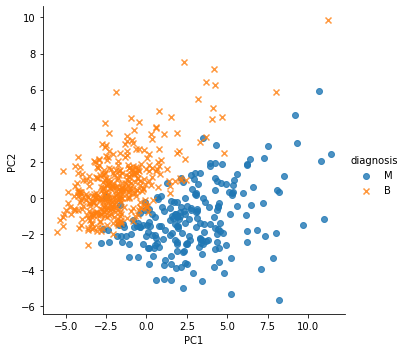

In [19]:
sns.lmplot("PC1", "PC2", hue="diagnosis", data=Xy, fit_reg=False, markers=["o", "x"])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



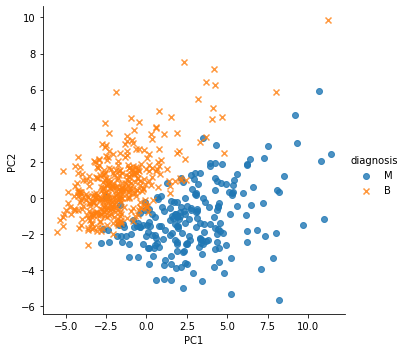

In [20]:
sns.lmplot("PC1", "PC2", hue="diagnosis", data=Xy, fit_reg=False, markers=["o", "x"])
plt.show()

In [21]:
X=(Xy.iloc[:,0:11]).values
#75:25 train:test data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


print("X_train shape ",X_train.shape)
print("y_train shape ",y_train.shape)
print("X_test shape ",X_test.shape)
print("y_test shape ",y_test.shape)

X_train shape  (455, 11)
y_train shape  (455,)
X_test shape  (114, 11)
y_test shape  (114,)


In [22]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [23]:
y_pred_svc =svc.predict(X_test)
y_pred_svc.shape

(114,)

In [24]:
cm = confusion_matrix(y_test, y_pred_svc)
print("Confusion matrix:\n",cm)

Confusion matrix:
 [[67  0]
 [ 3 44]]


In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test, y_pred_svc)

0.9736842105263158

In [27]:
creport = classification_report(y_test, y_pred_svc)
print("SVC report:\n",creport)

SVC report:
               precision    recall  f1-score   support

           B       0.96      1.00      0.98        67
           M       1.00      0.94      0.97        47

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [28]:
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()

kfold=KFold(10)
kfold.get_n_splits(X)
score=[]
recall=[]
precision=[]
F1=[]
for i,(train,test) in enumerate(kfold.split(X)):
  train_data,test_data=X[train],X[test]
  train_labels,test_labels=y[train],y[test]
  svc = SVC()
  svc.fit(train_data, train_labels)
  y_pred_svc =svc.predict(test_data)
  score.append(accuracy_score(test_labels, y_pred_svc))
  y_lt=lb.fit_transform(test_labels)
  y_plt=lb.transform(y_pred_svc)
  # print(test_labels, y_pred_svc)
  recall.append(recall_score(y_lt, y_plt))
  precision.append(precision_score(y_lt, y_plt))
  F1.append(f1_score(y_lt, y_plt))

  print("i-",i,"score: ", accuracy_score(test_labels, y_pred_svc), "recall- ",recall[i], "precision- ",precision[i], "f1- ", F1[i])



i- 0 score:  0.9649122807017544 recall-  0.9565217391304348 precision-  1.0 f1-  0.9777777777777777
i- 1 score:  0.9298245614035088 recall-  0.9090909090909091 precision-  0.9090909090909091 f1-  0.9090909090909091
i- 2 score:  0.9649122807017544 recall-  0.9523809523809523 precision-  0.9523809523809523 f1-  0.9523809523809523
i- 3 score:  0.9649122807017544 recall-  0.9285714285714286 precision-  1.0 f1-  0.962962962962963
i- 4 score:  0.9649122807017544 recall-  0.9285714285714286 precision-  1.0 f1-  0.962962962962963
i- 5 score:  0.9649122807017544 recall-  0.9166666666666666 precision-  0.9166666666666666 f1-  0.9166666666666666
i- 6 score:  1.0 recall-  1.0 precision-  1.0 f1-  1.0
i- 7 score:  1.0 recall-  1.0 precision-  1.0 f1-  1.0
i- 8 score:  1.0 recall-  1.0 precision-  1.0 f1-  1.0
i- 9 score:  0.9642857142857143 recall-  0.9230769230769231 precision-  0.9230769230769231 f1-  0.9230769230769231


In [29]:
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score, precision_score, f1_score, roc_curve
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()

kfold=KFold(10)
kfold.get_n_splits(X)
score=[]
recall=[]
precision=[]
F1=[]
for i,(train,test) in enumerate(kfold.split(X)):
  train_data,test_data=X[train],X[test]
  train_labels,test_labels=y[train],y[test]
  svc = SVC()
  svc.fit(train_data, train_labels)
  y_pred_svc =svc.predict(train_data)
  score.append(accuracy_score(train_labels, y_pred_svc))
  y_lt=lb.fit_transform(train_labels)
  y_plt=lb.transform(y_pred_svc)
  # print(test_labels, y_pred_svc)
  recall.append(recall_score(y_lt, y_plt))
  precision.append(precision_score(y_lt, y_plt))
  F1.append(f1_score(y_lt, y_plt))

  print("i-",i,"score: ", accuracy_score(train_labels, y_pred_svc), "recall- ",recall[i], "precision- ",precision[i], "f1- ", F1[i])



i- 0 score:  0.984375 recall-  0.9578313253012049 precision-  0.99375 f1-  0.9754601226993865
i- 1 score:  0.986328125 recall-  0.9631578947368421 precision-  1.0 f1-  0.9812332439678284
i- 2 score:  0.984375 recall-  0.9633507853403142 precision-  0.9945945945945946 f1-  0.9787234042553191
i- 3 score:  0.982421875 recall-  0.9565217391304348 precision-  0.9943502824858758 f1-  0.9750692520775623
i- 4 score:  0.98828125 recall-  0.9728260869565217 precision-  0.9944444444444445 f1-  0.9835164835164836
i- 5 score:  0.986328125 recall-  0.97 precision-  0.9948717948717949 f1-  0.9822784810126582
i- 6 score:  0.984375 recall-  0.9642857142857143 precision-  0.9947368421052631 f1-  0.9792746113989639
i- 7 score:  0.982421875 recall-  0.9597989949748744 precision-  0.9947916666666666 f1-  0.9769820971867007
i- 8 score:  0.984375 recall-  0.964824120603015 precision-  0.9948186528497409 f1-  0.9795918367346939
i- 9 score:  0.98635477582846 recall-  0.9698492462311558 precision-  0.9948453608

<BarContainer object of 10 artists>

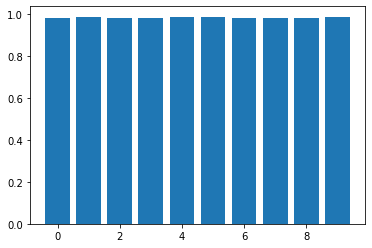

In [30]:
plt.bar(range(0,10),score)

<BarContainer object of 10 artists>

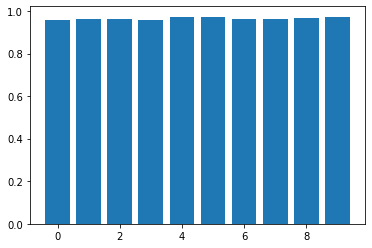

In [31]:
plt.bar(range(0,10),recall)

<BarContainer object of 10 artists>

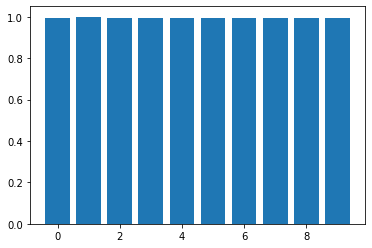

In [32]:
plt.bar(range(0,10),precision)

<ErrorbarContainer object of 3 artists>

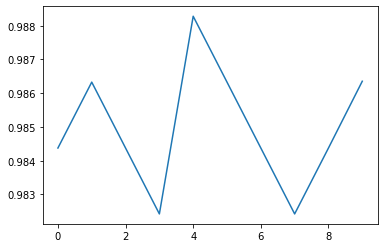

In [33]:
plt.errorbar(range(0,10),score)

In [34]:
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions, 'b--', label='precision')
    plt.plot(thresholds, recalls, 'g--', label = 'recall')
    plt.xlabel('k')
    plt.legend(loc='upper left')
    plt.ylim([.95,1])

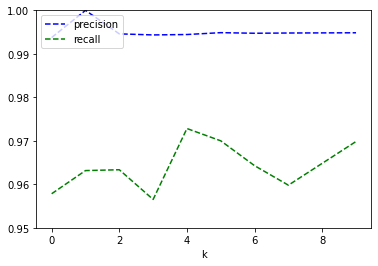

In [35]:
plot_prec_recall_vs_tresh(precision,recall,range(0,10))

i- 0 score:  0.984375 recall-  0.9578313253012049 precision-  0.99375 f1-  0.9754601226993865
i- 1 score:  0.986328125 recall-  0.9631578947368421 precision-  1.0 f1-  0.9812332439678284
i- 2 score:  0.984375 recall-  0.9633507853403142 precision-  0.9945945945945946 f1-  0.9787234042553191
i- 3 score:  0.982421875 recall-  0.9565217391304348 precision-  0.9943502824858758 f1-  0.9750692520775623
i- 4 score:  0.98828125 recall-  0.9728260869565217 precision-  0.9944444444444445 f1-  0.9835164835164836
i- 5 score:  0.986328125 recall-  0.97 precision-  0.9948717948717949 f1-  0.9822784810126582
i- 6 score:  0.984375 recall-  0.9642857142857143 precision-  0.9947368421052631 f1-  0.9792746113989639
i- 7 score:  0.982421875 recall-  0.9597989949748744 precision-  0.9947916666666666 f1-  0.9769820971867007
i- 8 score:  0.984375 recall-  0.964824120603015 precision-  0.9948186528497409 f1-  0.9795918367346939
i- 9 score:  0.98635477582846 recall-  0.9698492462311558 precision-  0.9948453608

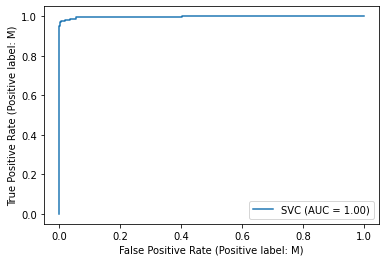

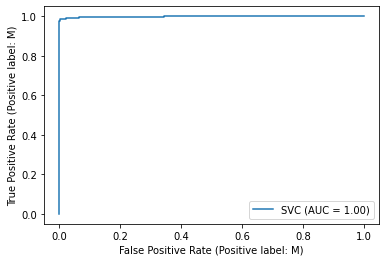

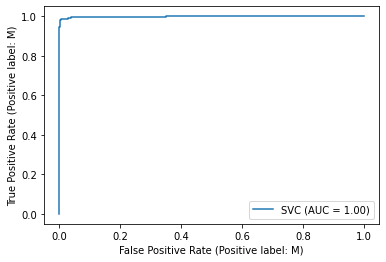

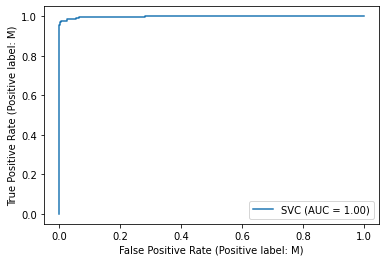

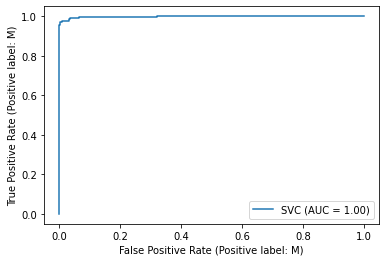

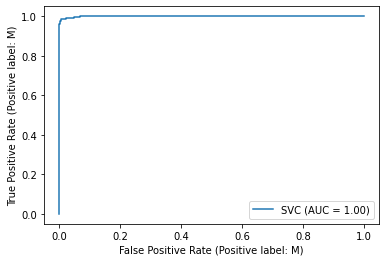

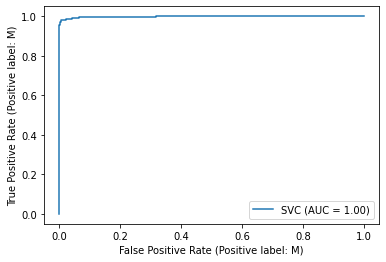

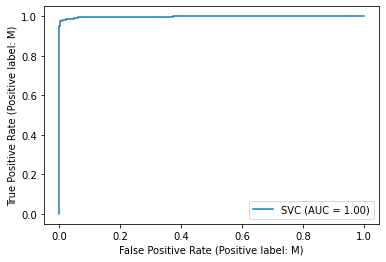

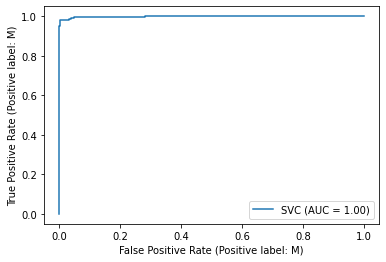

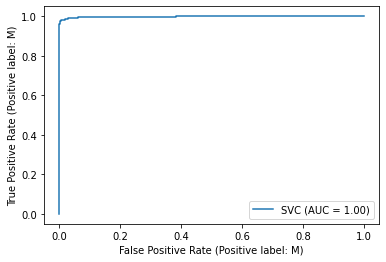

In [36]:
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()

kfold=KFold(10)
kfold.get_n_splits(X)
score=[]
recall=[]
precision=[]
F1=[]
for i,(train,test) in enumerate(kfold.split(X)):
  train_data,test_data=X[train],X[test]
  train_labels,test_labels=y[train],y[test]
  svc = SVC()
  svc.fit(train_data, train_labels)
  y_pred_svc =svc.predict(train_data)
  score.append(accuracy_score(train_labels, y_pred_svc))
  y_lt=lb.fit_transform(train_labels)
  y_plt=lb.transform(y_pred_svc)
  # print(test_labels, y_pred_svc)
  recall.append(recall_score(y_lt, y_plt))
  precision.append(precision_score(y_lt, y_plt))
  F1.append(f1_score(y_lt, y_plt))
  RocCurveDisplay.from_estimator(svc,train_data,train_labels)
  print("i-",i,"score: ", accuracy_score(train_labels, y_pred_svc), "recall- ",recall[i], "precision- ",precision[i], "f1- ", F1[i])



In [37]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.utils import shuffle


In [38]:
print("data read")
data = pd.read_csv('/content/drive/MyDrive/data.csv')

data read


In [39]:
data.drop(data.columns[[-1, 0]], axis=1, inplace=True)

In [40]:
# convert categorical labels to numbers
diag_map = {'M': 1.0, 'B': -1.0}
data['diagnosis'] = data['diagnosis'].map(diag_map)

In [41]:
Y = data.loc[:, 'diagnosis']
X = data.iloc[:, 1:]

In [42]:
def remove_correlated_features(data):
    # Define a correlation threshold above which features are considered correlated
    threshold = 0.9
    
    # Calculate the correlation matrix
    corr_matrix = data.corr()
    
    # Create an array to mark which columns to drop
    drop_columns = np.full(corr_matrix.shape[0], False, dtype=bool)
    
    # Iterate over the columns and compare their correlations to other columns
    for i in range(corr_matrix.shape[0]):
        for j in range(i + 1, corr_matrix.shape[0]):
            # If two columns are highly correlated, mark one of them to be dropped
            if corr_matrix.iloc[i, j] >= threshold:
                drop_columns[j] = True
                
    # Get the names of the columns to be dropped
    columns_to_drop = data.columns[drop_columns]
    
    # Drop the correlated columns from the data
    data.drop(columns_to_drop, axis=1, inplace=True)
    
    # Return the names of the columns that were dropped
    return columns_to_drop

In [43]:
def remove_less_significant_features(X, Y):
    significance_level = 0.05
    ols_regression = None
    dropped_columns = np.array([])
    for itr in range(0, len(X.columns)):
        # fit the Ordinary Least Squares (OLS) regression model and get the p-values
        ols_regression = sm.OLS(Y, X).fit()
        max_p_value_column = ols_regression.pvalues.idxmax()
        max_p_value = ols_regression.pvalues.max()
        if max_p_value > significance_level:
            # drop the column with the highest p-value above the threshold
            X.drop(max_p_value_column, axis='columns', inplace=True)
            dropped_columns = np.append(dropped_columns, [max_p_value_column])
        else:
            # stop if no more columns with p-value above the threshold
            break
    # print the summary of the OLS regression model
    ols_regression.summary()
    return dropped_columns

In [44]:
remove_correlated_features(X)
remove_less_significant_features(X, Y)

array(['smoothness_mean', 'compactness_worst', 'compactness_mean',
       'radius_mean', 'texture_se', 'symmetry_se', 'smoothness_se',
       'concavity_worst'], dtype='<U32')

In [45]:
X_normalized = MinMaxScaler().fit_transform(X.values)
X = pd.DataFrame(X_normalized)

In [46]:
X.insert(loc=len(X.columns), column='intercept', value=1)

In [47]:
# data set is split into train and test
X_train, X_test, y_train, y_test = tts(X, Y, test_size=0.2, random_state=42)

In [48]:
def svm(features, labels,cost_threshold = 0.01):
    # Initialize weights to zeros
    weights = np.zeros(features.shape[1])
    pre_cost = float("inf")
    nth = 0
    for epoch in range(1, epochs):
        # Shuffle to prevent repeating update cycles
        shuffled_features, shuffled_labels = shuffle(features, labels)
        for index, feature in enumerate(shuffled_features):
            # Calculate gradient of loss with respect to weights
            gradient = calculate_loss_gradient(weights, feature, shuffled_labels[index])

            # Update weights
            weights = weights - (learn_rate * gradient)

        # test if converging on nth sqr
        if epoch == 2 ** nth or epoch == epochs - 1:
            # Calculate cost
            cost = compute_loss(weights, features, labels)
            print("Epoch is: {} and Cost is: {}".format(epoch, cost))
            if abs(pre_cost - cost) < cost_threshold * pre_cost:
                return weights
            pre_cost = cost
            nth += 1
    return weights

In [49]:
def calculate_loss_gradient(weights, features_batch, labels_batch):
    # If only one example is passed (e.g. in case of stochastic gradient descent)
    if type(labels_batch) == np.float64:
        labels_batch = np.array([labels_batch])
        features_batch = np.array([features_batch])  # Gives multidimensional array

    distances = 1 - (labels_batch * np.dot(features_batch, weights))
    gradient = np.zeros(len(weights))

    for index, distance in enumerate(distances):
        if max(0, distance) == 0:
            gradient_increment = weights
        else:
            gradient_increment = weights - (regularization_param * labels_batch[index] * features_batch[index])
        gradient += gradient_increment

    gradient = gradient / len(labels_batch)  # Average
    return gradient

In [50]:
def compute_loss(weights, features, labels):
    num_samples = features.shape[0]
    distances = 1 - labels * (np.dot(features, weights))
    distances[distances < 0] = 0
    hinge_loss = regularization_param * (np.sum(distances) / num_samples)
    regularization_loss = 1 / 2 * np.dot(weights, weights)
    cost = regularization_loss + hinge_loss
    return cost

In [51]:
epochs = 5000
regularization_param = 10000
learn_rate = 0.000001

In [52]:
y_train.to_numpy().shape

(455,)

In [53]:
    print("training started...")
    W = svm(X_train.to_numpy(), y_train.to_numpy())
    print("training finished.")
    print("weights are: {}".format(W))

training started...
Epoch is: 1 and Cost is: 7319.114949373717
Epoch is: 2 and Cost is: 6526.010036322462
Epoch is: 4 and Cost is: 5404.6271647854155
Epoch is: 8 and Cost is: 3830.857581093406
Epoch is: 16 and Cost is: 2695.1431789506723
Epoch is: 32 and Cost is: 1961.2564503952703
Epoch is: 64 and Cost is: 1583.853317063069
Epoch is: 128 and Cost is: 1325.0699135248487
Epoch is: 256 and Cost is: 1159.5306739664293
Epoch is: 512 and Cost is: 1074.844669087839
Epoch is: 1024 and Cost is: 1046.091778063618
Epoch is: 2048 and Cost is: 1042.7587788456358
training finished.
weights are: [ 3.56851271 11.06820566 -2.31059963 -7.9011053  10.15727011 -1.27771997
 -6.43828658  2.24870503 -3.87510944  3.23870965  4.95259034  4.81554304
 -4.71135123]


In [54]:
print("testing the model...")
y_train_predicted = np.array([])
for i in range(X_train.shape[0]):
    yp = np.sign(np.dot(X_train.to_numpy()[i], W))
    y_train_predicted = np.append(y_train_predicted, yp)

y_test_predicted = np.array([])
for i in range(X_test.shape[0]):
    yp = np.sign(np.dot(X_test.to_numpy()[i], W))
    y_test_predicted = np.append(y_test_predicted, yp)


testing the model...


In [55]:
print("Accuracy score on the test dataset: {}".format(accuracy_score(y_test, y_test_predicted)))
print("Recall score on the test dataset: {}".format(recall_score(y_test, y_test_predicted)))
print("Precision score on the test dataset: {}".format(precision_score(y_test, y_test_predicted)))


Accuracy score on the test dataset: 0.9912280701754386
Recall score on the test dataset: 0.9767441860465116
Precision score on the test dataset: 1.0


In [56]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/implementation_correctness_dataset.csv')

In [57]:
df

,Feature 1,Feature 2,Class/Cluster
0,0.020,0.000000,1
1,1.045,0.000000,1
2,2.080,0.000000,1
3,3.125,0.000000,1
4,4.180,0.000000,1
5,5.245,0.000000,1
6,6.320,0.000000,1
7,7.405,0.000000,1
8,8.500,0.000000,1
9,9.605,0.000000,1


#formatting values

In [58]:
df.iloc[:,-1]=df.iloc[:,-1].replace(2,-1)

In [59]:
df


,Feature 1,Feature 2,Class/Cluster
0,0.020,0.000000,1
1,1.045,0.000000,1
2,2.080,0.000000,1
3,3.125,0.000000,1
4,4.180,0.000000,1
5,5.245,0.000000,1
6,6.320,0.000000,1
7,7.405,0.000000,1
8,8.500,0.000000,1
9,9.605,0.000000,1


#Step 1:Show a scatterplot of the dataset including the test datapoint

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



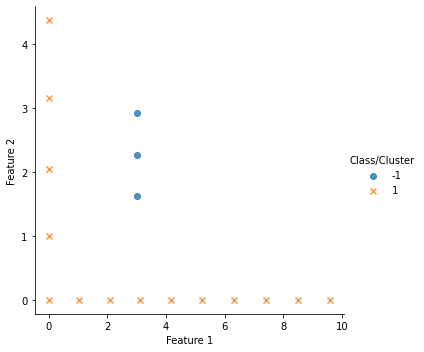

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot("Feature 1", "Feature 2", hue="Class/Cluster", data=df, fit_reg=False, markers=["o", "x"])
plt.show()

In [61]:
test_data=df
test_data.loc[len(test_data.index)]=[4,4,0]

## adding test data and replotting

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



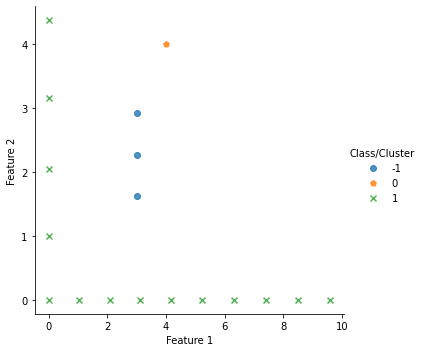

In [62]:
sns.lmplot("Feature 1", "Feature 2", hue="Class/Cluster", data=test_data, fit_reg=False, markers=['o','p','x'])
plt.show()

#SMV def 

In [63]:
import numpy as np


class SVM:
    def __init__(self, C=1.0):
        # C is the error term
        self.C = C
        self.weights = 0
        self.bias = 0

    # Hinge Loss Function / Calculation
    def hinge_loss(self, weights, bias, x, y):
        # Regularizer term
        reg = 0.5 * (weights * weights)

        for i in range(x.shape[0]):
            # Optimization term
            opt_term = y[i] * ((np.dot(weights, x[i])) + bias)

            # calculating loss
            loss = reg + self.C * max(0, 1 - opt_term)
        return loss[0][0]

    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
        # The number of features in X
        num_features = X.shape[1]

        # The number of Samples in X
        num_samples = X.shape[0]

        c = self.C

        # Creating ids from 0 to num_samples - 1
        ids = np.arange(num_samples)

        # Shuffling the samples randomly
        np.random.shuffle(ids)

        # creating an array of zeros
        weights = np.zeros((1, num_features))
        bias = 0
        losses = []

        # Gradient Descent logic
        for i in range(epochs):
            # Calculating the Hinge Loss
            l = self.hinge_loss(weights, bias, X, Y)

            # Appending all losses 
            losses.append(l)
            
            # Starting from 0 to the number of samples with batch_size as interval
            for batch_start in range(0, num_samples, batch_size):
                grad_weights = 0
                grad_bias = 0

                for j in range(batch_start, batch_start + batch_size):
                    if j < num_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(weights, X[x].T) + bias)

                        if ti > 1:
                            grad_weights += 0
                            grad_bias += 0
                        else:
                            # Calculating the gradients

                            # w.r.t weights 
                            grad_weights += c * Y[x] * X[x]
                            # w.r.t bias
                            grad_bias += c * Y[x]

                # Updating weights and bias
                weights = weights - learning_rate * weights + learning_rate * grad_weights
                bias = bias + learning_rate * grad_bias
        
        self.weights = weights
        self.bias = bias

        return self.weights, self.bias, losses

    def predict(self, X):
        
        prediction = np.dot(X, self.weights[0]) + self.bias # weights.x + bias
        return np.sign(prediction)
        

In [64]:
X = df.iloc[:,:-1] # take feature 1 and feature2 for train
y = df.iloc[:,-1]
print(y.shape)
y

(18,)


0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14   -1
15   -1
16   -1
17    0
Name: Class/Cluster, dtype: int64

In [65]:
svc=SVM()

In [66]:
X

,Feature 1,Feature 2
0,0.020,0.000000
1,1.045,0.000000
2,2.080,0.000000
3,3.125,0.000000
4,4.180,0.000000
5,5.245,0.000000
6,6.320,0.000000
7,7.405,0.000000
8,8.500,0.000000
9,9.605,0.000000


#Step 2 and 3: While training your SVM show a plot such that
##its horizontal axis corresponds to iterations of optimization updates 

##and its vertical axis indicates the value of the objective function of SVM at that iteration
##Explain if and why the behavior shown in this plot is correct or not
###Train first time (without feature 3)

In [67]:
w,b,l=svc.fit(X[:-1].to_numpy(),y[:-1].to_numpy()) # train everything except last row

Text(0, 0.5, 'Loss')

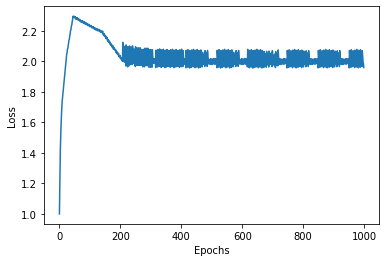

In [68]:
plt.plot(range(0,len(l)),l)
plt.xlabel("Epochs")
plt.rcParams["figure.figsize"] = (10,6)
plt.ylabel("Loss")

### The loss never settled 

#Step 4:After training is finished,
##report the calculated values of w and b (as defined in the course slides)

##If you implemented a hard-margin SVM, then in your scatterplot denote with filled circles ALL the support vectors, and with empty circles the rest of the points

##in your scatterplot draw the separating hyperplane

##Show exactly how your trained SVM decides the class of the test datapoint and what class it assigns it in

In [69]:
print(f"Weight:{w} Bias: {b}")

Weight:[[ 0.02246194 -0.01365085]] Bias: 1.0460000000000313


### test SVM (iteration 1) with (4,4)

In [70]:
test = (4,4)
svc.predict(test)

1.0

In [71]:
svc.predict(X.to_numpy())

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

###**looks like train data results are wrong ( training is NOT happening properly)**

#hyperplane

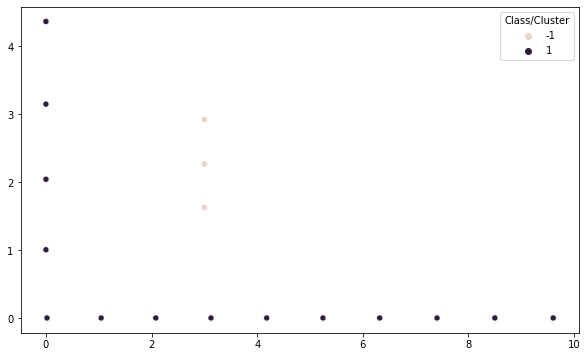

In [72]:
sns.scatterplot(x=X[:-1].values[:,0], 
                y=X[:-1].values[:, 1], 
                hue=y[:-1]);

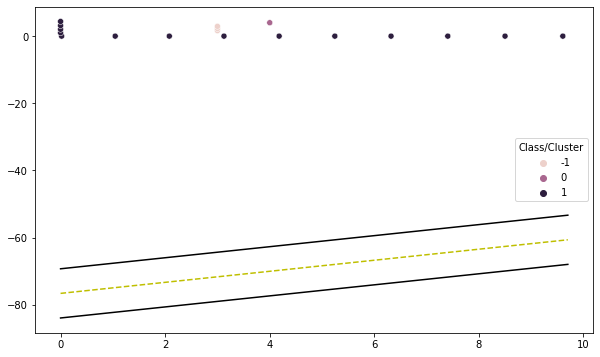

In [73]:
import seaborn as sns

def visualize_svm():
    """
    Plots the SVM decision boundary and support vectors.

    """
    # Plot data points
    sns.scatterplot(x=X.values[:,0], y=X.values[:, 1], hue=y)

    # Define hyperplane function
    def hyperplane(x, w, b, v):
        return -(w[0][0]*x-b+v) / w[0][1]

    # Set the range of data points to plot
    datarange = (min(X.iloc[:,0])*0.99, max(X.iloc[:,0])*1.01)
    hyp_x_min = datarange[0]
    hyp_x_max = datarange[1]

    # Plot positive support vector hyperplane
    psv1 = hyperplane(hyp_x_min, w, b, 0.1)
    psv2 = hyperplane(hyp_x_max, w, b, 0.1)
    plt.plot([hyp_x_min, hyp_x_max], [psv1, psv2], 'k')

    # Plot negative support vector hyperplane
    nsv1 = hyperplane(hyp_x_min, w, b, -0.1)
    nsv2 = hyperplane(hyp_x_max, w, b, -0.1)
    plt.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], 'k')

    # Plot decision boundary
    db1 = hyperplane(hyp_x_min, w, b, 0)
    db2 = hyperplane(hyp_x_max, w, b, 0)
    plt.plot([hyp_x_min, hyp_x_max], [db1, db2], 'y--')

    # Show the plot
    plt.show()

visualize_svm()


##  **the hyper plane seems categprize all values as 1**

# Step 5: Define the mapping [a, b] -> [a, b, 2*a*b/(a+b)] and transform all datapoints accordingly. Then repeat steps 1-4 for the transformed dataset. What do you observe? Explain if and why your SVM benefitted from this transformation. 

## defining mapping

In [74]:

X['Feature 3']=X.apply(lambda x: 2*x['Feature 1']*x["Feature 2"]/(x['Feature 1']+x["Feature 2"]),axis=1)#2*a*b/(a+b)
print(X.shape)
X

(18, 3)


,Feature 1,Feature 2,Feature 3
0,0.020,0.000000,0.000000
1,1.045,0.000000,0.000000
2,2.080,0.000000,0.000000
3,3.125,0.000000,0.000000
4,4.180,0.000000,0.000000
5,5.245,0.000000,0.000000
6,6.320,0.000000,0.000000
7,7.405,0.000000,0.000000
8,8.500,0.000000,0.000000
9,9.605,0.000000,0.000000


#train with feature 3

In [75]:
w,b,l=svc.fit(X[:-1].to_numpy(),y[:-1].to_numpy()) # train everything except last row

Text(0, 0.5, 'Loss')

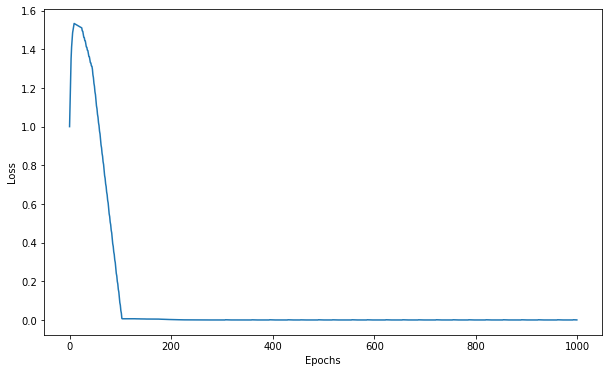

In [76]:
plt.plot(range(0,len(l)),l)
plt.xlabel("Epochs")
plt.rcParams["figure.figsize"] = (10,6)
plt.ylabel("Loss")

In [77]:
print(f"Weight:{w} Bias: {b}")

Weight:[[ 0.02159314  0.00297693 -0.96020703]] Bias: 1.0070000000000254


In [78]:
svc.predict(X.to_numpy())

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1., -1., -1., -1.])

## predicting test data (4,4)

In [79]:
test = (4,4,4) # feature 3 of test data(4,4) is 4 hence (4,4,4)
svc.predict(test)

-1.0

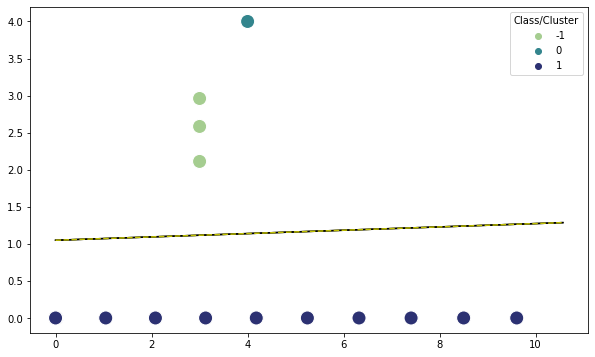

In [80]:
def visualize():
    # Visualize the data points and the decision boundary
    sns.scatterplot(x=X.values[:,0], 
                    y=X.values[:, 2], 
                    hue=y,
                    markers=['o','x','1'],
                    s=200,
                    palette='crest')

    # Define the hyperplane function as (w.x+b)/|w|
    def hyperplane(x, w, b):
        return (-w[0][0]*x-b) / w[0][2]

    # Set the data range for the plot
    datarange = (min(X.iloc[:,0])*0.9,max(X.iloc[:,0])*1.1)
    hyp_x_min = datarange[0]
    hyp_x_max = datarange[1]

    # Plot the positive support vector hyperplane
    psv1 = hyperplane(hyp_x_min, w, b)
    psv2 = hyperplane(hyp_x_max, w, b)
    plt.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

    # Plot the negative support vector hyperplane
    nsv1 = hyperplane(hyp_x_min, w, b)
    nsv2 = hyperplane(hyp_x_max, w, b)
    plt.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

    # Plot the decision boundary
    db1 = hyperplane(hyp_x_min, w, b)
    db2 = hyperplane(hyp_x_max, w, b)
    plt.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')

    # Show the plot
    plt.show()
visualize()

# We get proper result with feature 3
# The main problem with first iteration is that the weight were properly distributed among the features and it might have worked with Poly SVM.
# Benefit for feature 3(tranformation) adding feature 3 give us a good linear hyperplane which seperates the -1 and 1 clearly as shown in the plot.
# Feature 3 has higher weight (dot product) which will also help with classification.